In [1]:
from file_hopping import Txt_hop
%matplotlib inline
from graph_hop import Graph_hop
import numpy as np
from hmm import HMM

# 6bs_hop

In [2]:
# directory name
dir_name = "P5bp_3bs_hop/6"
# molecule name is a number in these experimets
number = "6"

In [3]:
file = Txt_hop(dir_name, number, first_time_molecule=False)
dataFrame = file.bricolage()

In [4]:
dataFrame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.8744,0.3450,241.28955,4.6226,11229.69043
1,-0.5743,0.2851,241.33320,4.8313,11229.68945
2,-0.0089,0.4533,241.52090,4.8414,11229.69141
3,-0.6267,0.1575,242.01415,4.9121,11229.69141
4,-0.8256,-0.0223,241.46580,4.8448,11229.69238
...,...,...,...,...,...
71653,-0.4958,-0.1499,202.69990,4.3768,11352.15137
71654,-0.5394,-0.0649,202.86730,4.1580,11352.15137
71655,-0.1904,-0.0610,202.75605,4.1714,11352.15234
71656,-0.8256,-0.2389,202.29785,4.3128,11352.15332


In [5]:
forces_average = []
forces_average_std = []
w_U = []
w_N = []
sigma_w_U = []
sigma_w_N = []
native_time = []
unfolded_time = []
def mean(mu1, mu2):
    return (mu1+mu2)/2

def err_prop_mean(sigma1, sigma2):
    return np.sqrt(sigma1**2+sigma2**2)/2

# File 1

f media vale = 4.859708349244894, con deviazione standard = 0.2297842061185802


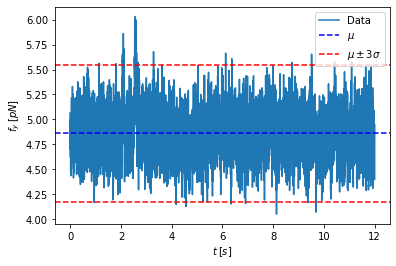

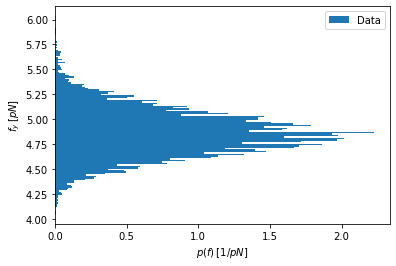

In [6]:
grafici = Graph_hop(dir_name, number, 1)
data_frame = grafici.do_graph(12)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

## Suspicious data: no hopping events observed

In [7]:
# prova = [2.2, 4., 0.3, 0.3, 3.5, 0.1]
# fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)

In [8]:
# forces_average.append(mean(fitting_par[1], fitting_par[4]))
# forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
# w_U.append(prob[0])
# w_N.append(prob[1])
# sigma_w_U.append(err_prob[0])
# sigma_w_N.append(err_prob[1])

In [9]:
# grafici.subplots(fitting_par)

In [10]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.8744,0.3450,241.28955,4.6226,0.00000
1,-0.5743,0.2851,241.33320,4.8313,-0.00098
2,-0.0089,0.4533,241.52090,4.8414,0.00098
3,-0.6267,0.1575,242.01415,4.9121,0.00098
4,-0.8256,-0.0223,241.46580,4.8448,0.00195
...,...,...,...,...,...
11517,-0.4347,0.4494,240.83420,4.3936,11.99609
11518,-0.3021,0.4726,241.40495,4.5216,11.99707
11519,-0.2288,0.2967,240.99135,4.5788,11.99707
11520,-0.1555,0.2213,241.31350,4.7202,11.99902


# File 2

f media vale = 4.51343097083153, con deviazione standard = 0.3093360298788302


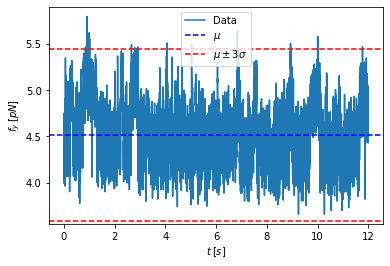

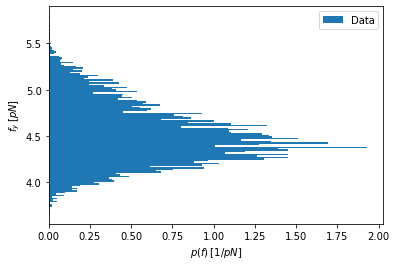

In [11]:
grafici = Graph_hop(dir_name, number, 2)
data_frame = grafici.do_graph(12)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

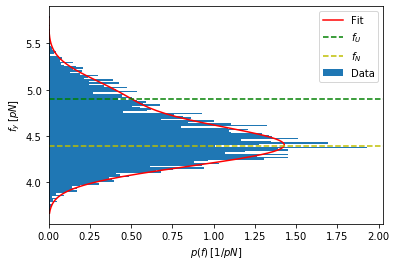

c_1 = 0.4152307605806471, mu_1 = 4.896292872081449, sigma_1 = 0.23270250457859373
c_2 = 1.3875198594709222, mu_2 = 4.390438679198719, sigma_2 = 0.21764978352936215
sigma_c_1 = 0.053432230821691996, sigma_mu_1 = 0.08397054456330426, sigma_sigma_1 = 0.05860618090860066
sigma_c_2 = 0.09371837105139708, sigma_mu_2 = 0.023021786425086278, sigma_sigma_2 = 0.011368202433906245
w_U = 0.7569851878137825, sigma_w_U = 0.017539620381767637
w_N = 0.24220355352649653, sigma_w_N = 0.1362907347390355


In [12]:
prova = [0.4, 4.9, 0.1, 1.4, 4.3, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [13]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

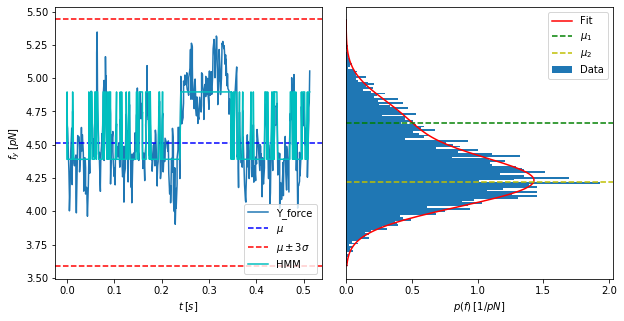

In [14]:
grafici.subplots(fitting_par, True, 500)

In [15]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 3.489 sec nello stato nativo e 7.996 sec nello stato unfolded


In [16]:
native_hmm = []
unfolded_hmm = []

In [17]:
A = [[0.92, 0.08], [0.03, 0.97]] # taken by an article
PI = [0.5, 0.5]
X_fin = []
for i in range(0,12000,600):
    hidden = HMM(2, A, PI, data_frame['Y_force'].iloc[i:i+600].reset_index()['Y_force'], fitting_par)
    alpha, beta, X_1, A_1, PI_1 = hidden.iteration(MAX_ITERATION=200, show=False)
    X_fin.extend(X_1)
    print(f"LOADING {i/60+10}%")

states = []
for x in X_fin:
    if x == 0:
        states.append(fitting_par[1])
    else:
        states.append(fitting_par[4])
native = len([i for i in states if i == fitting_par[1]])*1e-3 # up force # [t_min:t_max]
unfolded = len([j for j in states if j == fitting_par[4]])*1e-3
native_hmm.append(native)
unfolded_hmm.append(unfolded)

LOADING 10.0%
LOADING 20.0%
LOADING 30.0%
LOADING 40.0%
LOADING 50.0%
LOADING 60.0%
LOADING 70.0%
LOADING 80.0%
LOADING 90.0%
LOADING 100.0%
LOADING 110.0%
LOADING 120.0%
LOADING 130.0%
LOADING 140.0%
LOADING 150.0%
LOADING 160.0%
LOADING 170.0%
LOADING 180.0%
LOADING 190.0%
LOADING 200.0%


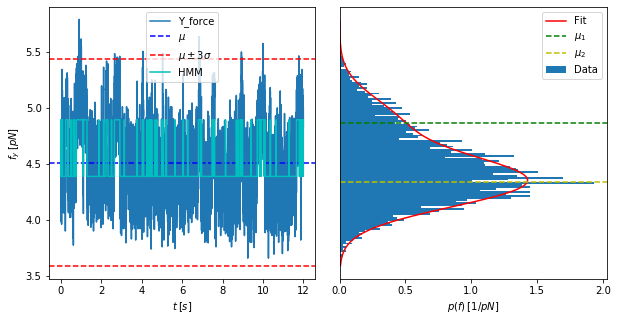

In [18]:
grafici.subplots(fitting_par, n_points_fig=12000, X=X_fin)

In [19]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.0037,0.2706,229.50695,4.5485,0.00000
1,-0.6162,0.2010,229.42095,4.6545,0.00000
2,-0.1276,0.2638,229.49880,4.6226,0.00098
3,-1.0001,0.5731,229.58760,4.2926,0.00391
4,-1.1746,0.4958,229.85130,4.1176,0.00488
...,...,...,...,...,...
11480,-1.2234,0.5693,229.20460,4.4273,11.99414
11481,-0.5115,0.5113,229.51750,5.0131,11.99512
11482,-0.5394,0.3411,229.88455,4.7842,11.99609
11483,-0.7907,0.1865,229.64385,4.9727,11.99707


# File 3

f media vale = 4.180057203721436, con deviazione standard = 0.307486384475614


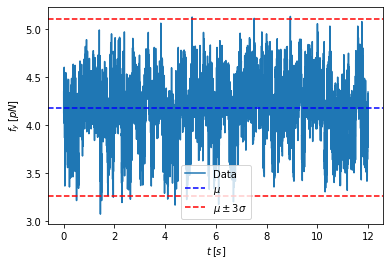

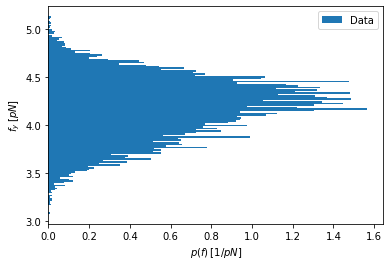

In [20]:
grafici = Graph_hop(dir_name, number, 3)
data_frame = grafici.do_graph(12)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

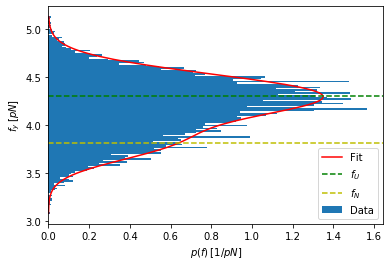

c_1 = 1.33106433291316, mu_1 = 4.3053200674305625, sigma_1 = 0.22471639766563312
c_2 = 0.518883026054904, mu_2 = 3.8090533497756422, sigma_2 = 0.19041609814758959
sigma_c_1 = 0.02929167502430234, sigma_mu_1 = 0.016263636331997955, sigma_sigma_1 = 0.012789562923714958
sigma_c_2 = 0.06056594208227116, sigma_mu_2 = 0.0348896988157086, sigma_sigma_2 = 0.02000428137735466
w_U = 0.24766410097462827, sigma_w_U = 0.09596840850532022
w_N = 0.7497625512454461, sigma_w_N = 0.00890930337130433


In [21]:
prova = [1.2, 4.5, 0.1, 1.2, 4.0, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [22]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

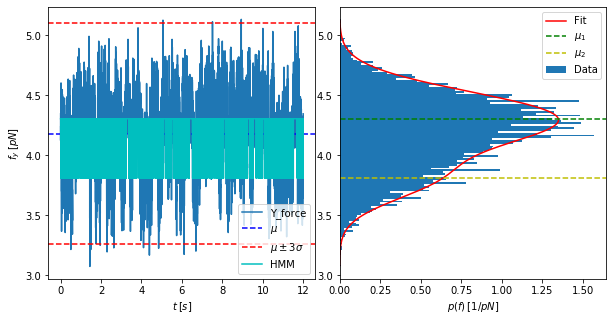

In [23]:
grafici.subplots(fitting_par)

In [24]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 7.809 sec nello stato nativo e 3.692 sec nello stato unfolded


In [25]:
A = [[0.92, 0.08], [0.03, 0.97]] # taken by an article
PI = [0.5, 0.5]
X_fin = []
for i in range(0,12000,600):
    hidden = HMM(2, A, PI, data_frame['Y_force'].iloc[i:i+600].reset_index()['Y_force'], fitting_par)
    alpha, beta, X_1, A_1, PI_1 = hidden.iteration(MAX_ITERATION=200, show=False)
    X_fin.extend(X_1)
    print(f"LOADING {i/60+10}%")

states = []
for x in X_fin:
    if x == 0:
        states.append(fitting_par[1])
    else:
        states.append(fitting_par[4])
native = len([i for i in states if i == fitting_par[1]])*1e-3 # up force # [t_min:t_max]
unfolded = len([j for j in states if j == fitting_par[4]])*1e-3
native_hmm.append(native)
unfolded_hmm.append(unfolded)

LOADING 10.0%
LOADING 20.0%
LOADING 30.0%
LOADING 40.0%
LOADING 50.0%
LOADING 60.0%
LOADING 70.0%
LOADING 80.0%
LOADING 90.0%
LOADING 100.0%
LOADING 110.0%
LOADING 120.0%
LOADING 130.0%
LOADING 140.0%
LOADING 150.0%
LOADING 160.0%
LOADING 170.0%
LOADING 180.0%
LOADING 190.0%
LOADING 200.0%


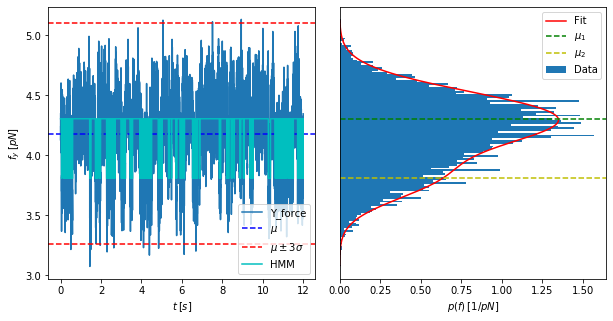

In [26]:
grafici.subplots(fitting_par, n_points_fig=12000, X=X_fin)

In [27]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.7628,0.0589,215.76515,4.3465,0.00000
1,-1.0559,0.2097,215.37710,4.1243,0.00098
2,-1.1083,0.3112,215.40045,4.1394,0.00293
3,-0.6319,0.1575,215.25330,4.2455,0.00390
4,-0.1084,0.2909,215.10910,4.2404,0.00390
...,...,...,...,...,...
11496,-0.4330,0.1604,213.63970,3.8819,11.99512
11497,-0.6581,0.1430,213.80420,4.0182,11.99609
11498,-0.7104,0.0502,213.43885,3.7708,11.99609
11499,-0.9163,-0.0842,213.47040,3.9156,11.99707


# File 4

f media vale = 4.150962931782678, con deviazione standard = 0.3219841810492359


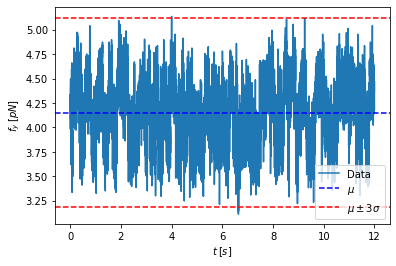

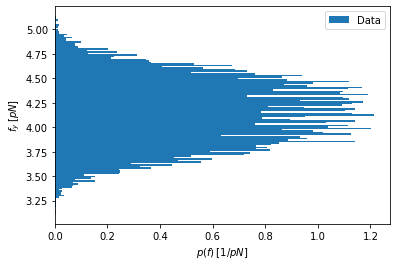

In [28]:
grafici = Graph_hop(dir_name, number, 4)
data_frame = grafici.do_graph(12)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

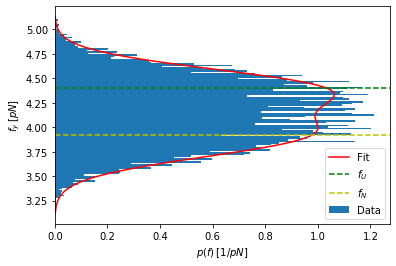

c_1 = 0.937681466228597, mu_1 = 4.39802850567272, sigma_1 = 0.20459939349152817
c_2 = 0.9159201525941919, mu_2 = 3.919062668320554, sigma_2 = 0.22599340816007674
sigma_c_1 = 0.06467917005714342, sigma_mu_1 = 0.02861602440267426, sigma_sigma_1 = 0.019104210982323972
sigma_c_2 = 0.06868381433886157, sigma_mu_2 = 0.03324094552156472, sigma_sigma_2 = 0.017455294496186987
w_U = 0.5188517914896734, sigma_w_U = 0.04056296893747721
w_N = 0.4808942764491423, sigma_w_N = 0.04321632322090727


In [29]:
prova = [1., 4.4, 0.1, 1., 4.1, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [30]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

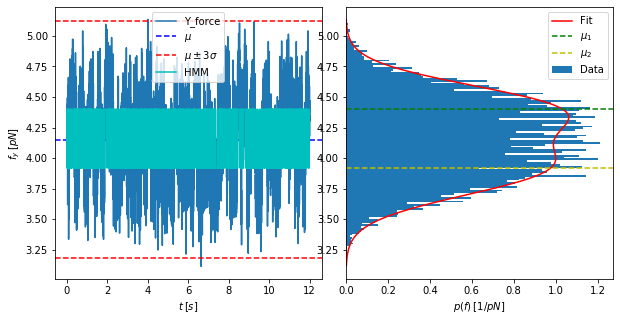

In [31]:
grafici.subplots(fitting_par)

In [32]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 5.726 sec nello stato nativo e 5.796 sec nello stato unfolded


In [33]:
A = [[0.92, 0.08], [0.03, 0.97]] # taken by an article
PI = [0.5, 0.5]
X_fin = []
for i in range(0,12000,600):
    hidden = HMM(2, A, PI, data_frame['Y_force'].iloc[i:i+600].reset_index()['Y_force'], fitting_par)
    alpha, beta, X_1, A_1, PI_1 = hidden.iteration(MAX_ITERATION=200, show=False)
    X_fin.extend(X_1)
    print(f"LOADING {i/60+10}%")

states = []
for x in X_fin:
    if x == 0:
        states.append(fitting_par[1])
    else:
        states.append(fitting_par[4])
native = len([i for i in states if i == fitting_par[1]])*1e-3 # up force # [t_min:t_max]
unfolded = len([j for j in states if j == fitting_par[4]])*1e-3
native_hmm.append(native)
unfolded_hmm.append(unfolded)

LOADING 10.0%
LOADING 20.0%
LOADING 30.0%
LOADING 40.0%
LOADING 50.0%
LOADING 60.0%
LOADING 70.0%
LOADING 80.0%
LOADING 90.0%
LOADING 100.0%
LOADING 110.0%
LOADING 120.0%
LOADING 130.0%
LOADING 140.0%
LOADING 150.0%
LOADING 160.0%
LOADING 170.0%
LOADING 180.0%
LOADING 190.0%
LOADING 200.0%


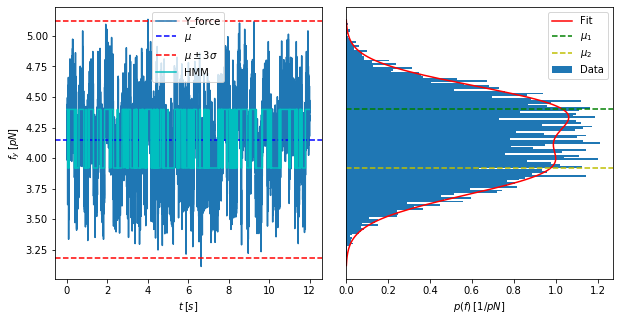

In [34]:
grafici.subplots(fitting_par, n_points_fig=12000, X=X_fin)

In [35]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.2881,0.0975,208.69150,4.2926,0.00000
1,0.0190,0.2290,209.30840,4.2724,0.00390
2,-0.4068,0.3179,209.19315,4.1782,0.00586
3,-0.1136,0.2532,209.45170,4.2909,0.00586
4,-0.3230,0.1604,209.02210,4.3313,0.00683
...,...,...,...,...,...
11517,-0.7209,0.0975,208.30875,4.2590,11.99512
11518,-0.4207,0.2870,208.52310,4.1782,11.99512
11519,-0.2393,0.2406,208.37815,4.4744,11.99609
11520,-0.2113,0.1439,208.22935,4.4206,11.99804


# File 5

f media vale = 4.1869682192245605, con deviazione standard = 0.326420386563406


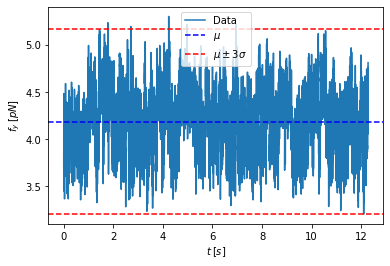

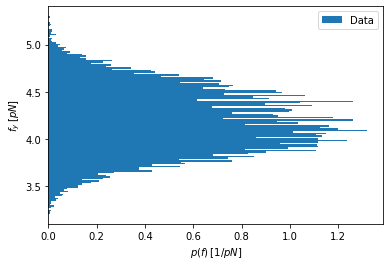

In [36]:
grafici = Graph_hop(dir_name, number, 5)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

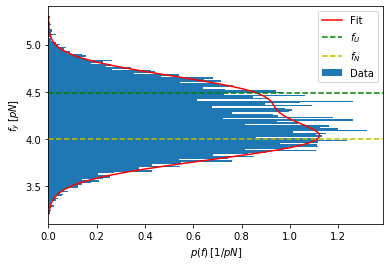

c_1 = 0.7552664573859748, mu_1 = 4.483334038203737, sigma_1 = 0.20268764948619736
c_2 = 1.0708789683231335, mu_2 = 3.999939294064811, sigma_2 = 0.22712393257851743
sigma_c_1 = 0.06013253948510674, sigma_mu_1 = 0.03295904688235364, sigma_sigma_1 = 0.022435584037951435
sigma_c_2 = 0.0619912204407902, sigma_mu_2 = 0.026754069955499227, sigma_sigma_2 = 0.014439151003752699
w_U = 0.6096677503232676, sigma_w_U = 0.025341530914407995
w_N = 0.38372263483652735, sigma_w_N = 0.05911596765044864


In [37]:
prova = [1., 4.5, 0.1, 1., 4., 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [38]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

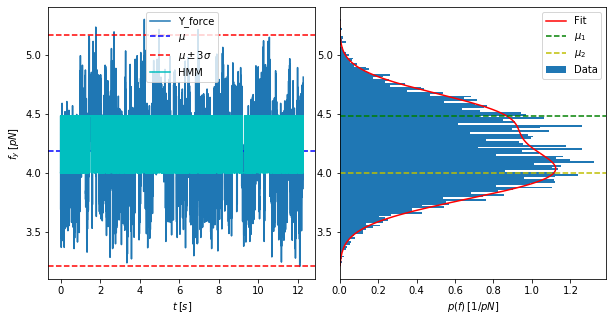

In [39]:
grafici.subplots(fitting_par)

In [40]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 5.048 sec nello stato nativo e 6.739 sec nello stato unfolded


In [41]:
A = [[0.92, 0.08], [0.03, 0.97]] # taken by an article
PI = [0.5, 0.5]
X_fin = []
for i in range(0,12000,600):
    hidden = HMM(2, A, PI, data_frame['Y_force'].iloc[i:i+600].reset_index()['Y_force'], fitting_par)
    alpha, beta, X_1, A_1, PI_1 = hidden.iteration(MAX_ITERATION=200, show=False)
    X_fin.extend(X_1)
    print(f"LOADING {i/60+10}%")

states = []
for x in X_fin:
    if x == 0:
        states.append(fitting_par[1])
    else:
        states.append(fitting_par[4])
native = len([i for i in states if i == fitting_par[1]])*1e-3 # up force # [t_min:t_max]
unfolded = len([j for j in states if j == fitting_par[4]])*1e-3
native_hmm.append(native)
unfolded_hmm.append(unfolded)

LOADING 10.0%
LOADING 20.0%
LOADING 30.0%
LOADING 40.0%
LOADING 50.0%
LOADING 60.0%
LOADING 70.0%
LOADING 80.0%
LOADING 90.0%
LOADING 100.0%
LOADING 110.0%
LOADING 120.0%
LOADING 130.0%
LOADING 140.0%
LOADING 150.0%
LOADING 160.0%
LOADING 170.0%
LOADING 180.0%
LOADING 190.0%
LOADING 200.0%


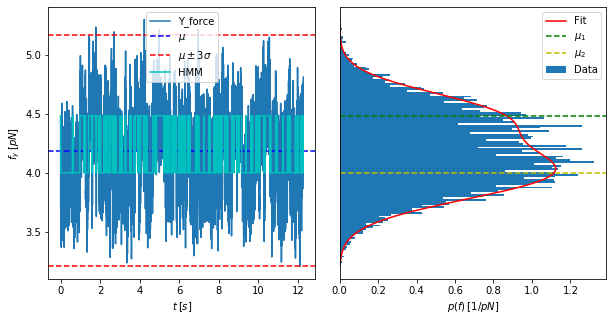

In [42]:
grafici.subplots(fitting_par, n_points_fig=12000, X=X_fin)

In [43]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.0609,-0.0301,203.16630,3.6934,0.00000
1,-0.4905,0.0473,202.91675,3.9358,0.00098
2,-0.1555,0.0473,203.58315,4.0031,0.00195
3,-0.5429,-0.0977,203.43050,3.8718,0.00293
4,-0.0613,-0.1441,203.23035,4.3061,0.00391
...,...,...,...,...,...
11782,-0.4958,-0.1499,202.69990,4.3768,12.27344
11783,-0.5394,-0.0649,202.86730,4.1580,12.27344
11784,-0.1904,-0.0610,202.75605,4.1714,12.27441
11785,-0.8256,-0.2389,202.29785,4.3128,12.27539


In [44]:
forces_average

[4.643365775640084, 4.057186708603102, 4.158545586996636, 4.241636666134275]

## Average of the average -> $\bar{f} = \frac{\mu_1 + \mu_2}{2}$

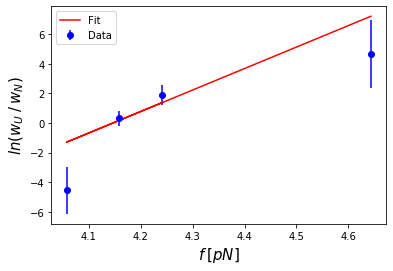

La forza di coesistenza vale f_c = 4.146238539549384, con sigma = 1.7214893016080453
La differenza di lunghezza tra lo stato foldend e unfolded e' x_NU = 14.53189744676712, con sigma = 4.24189865815394
La differenza di energia libera DeltaG_NU = 60.25271324656512, con sigma = 17.790180207048728


In [45]:
x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U, w_N, forces_average, sigma_w_U, sigma_w_N) 

In [46]:
G0 = grafici.G0(f_c)

DeltaG0 = 32.61716678131298, con sigma = 8.857925425835594


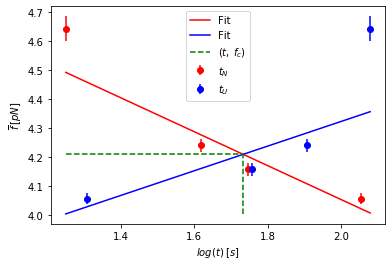

Stimiamo i parametri del fit lineare: m1 = -0.5846695913577629, con incertezza = 0.04921141837967563, 
 q1 = 5.223971588466965, con incertezza = 0.08856626558523005
Stimiamo i parametri del fit lineare: m2 = 0.42501144764847587, con incertezza = 0.0412894623706625, 
 q2 = 3.474138842935788, con incertezza = 0.06960160234337691
La forza di coesistenza qui vale: fc = 4.210707045754457, con incertezza = 0.07758866974436314
Il tempo medi di residenza vale: tc = 5.657912300891789, con incertezza = 0.8874772053894864
Stimiamo un nuovo DeltaG_NU = 61.18956296728352, con incertezza = 17.896944559797852


((-0.5846695913577629, 0.04921141837967563),
 (5.223971588466965, 0.08856626558523005),
 (0.42501144764847587, 0.0412894623706625),
 (3.474138842935788, 0.06960160234337691),
 (4.210707045754457, 0.07758866974436314),
 (5.657912300891789, 0.8874772053894864),
 (61.18956296728352, 17.896944559797852))

In [47]:
grafici.residence_time(native_time, unfolded_time, forces_average, forces_average_std)

# Parte qui sotto sballata! Non ha senso togliere punti

In [48]:
def remove_element(arr, pos):
    arr.pop(pos)
    return arr

In [49]:
# proviamo ad eliminare il pimo punto, quello più in alto
post = 0
forces_average = remove_element(forces_average, post)
forces_average_std = remove_element(forces_average_std, post)
w_U = remove_element(w_U, post)
w_N = remove_element(w_N, post)
sigma_w_U = remove_element(sigma_w_U, post)
sigma_w_N = remove_element(sigma_w_N, post)
native_time = remove_element(native_time, post)
unfolded_time = remove_element(unfolded_time, post)
native_hmm = remove_element(native_hmm, post)
unfolded_hmm = remove_element(unfolded_hmm, post)

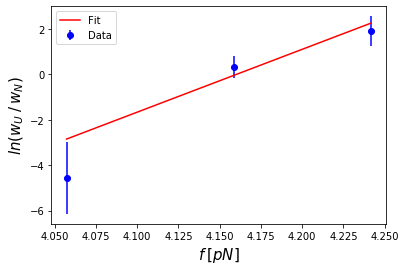

La forza di coesistenza vale f_c = 4.160158081085604, con sigma = 1.6497256302267405
La differenza di lunghezza tra lo stato foldend e unfolded e' x_NU = 27.674021710891736, con sigma = 7.7404708703512695
La differenza di energia libera DeltaG_NU = 115.1283050567047, con sigma = 32.363488321195554


In [50]:
x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U, w_N, forces_average, sigma_w_U, sigma_w_N) 

In [51]:
f_c

(4.160158081085604, 1.6497256302267405)

In [52]:
G0 = grafici.G0(f_c)

DeltaG0 = 32.79583213851229, con sigma = 8.515216737631079


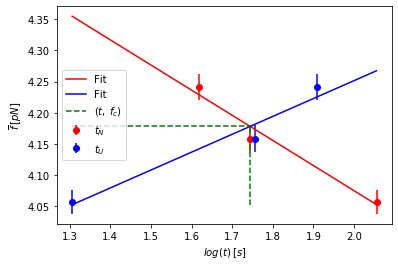

Stimiamo i parametri del fit lineare: m1 = -0.4030640838829461, con incertezza = 0.06316414755585972, 
 q1 = 4.881282493555128, con incertezza = 0.11587519478917942
Stimiamo i parametri del fit lineare: m2 = 0.2867067451350045, con incertezza = 0.04526173565167483, 
 q2 = 3.6781794128618186, con incertezza = 0.0747841888305301
La forza di coesistenza qui vale: fc = 4.178255313170004, con incertezza = 0.09194889660411364
Il tempo medi di residenza vale: tc = 5.721362405881571, con incertezza = 1.60387980864162
Stimiamo un nuovo DeltaG_NU = 115.62912825031546, con incertezza = 32.44161167624479


((-0.4030640838829461, 0.06316414755585972),
 (4.881282493555128, 0.11587519478917942),
 (0.2867067451350045, 0.04526173565167483),
 (3.6781794128618186, 0.0747841888305301),
 (4.178255313170004, 0.09194889660411364),
 (5.721362405881571, 1.60387980864162),
 (115.62912825031546, 32.44161167624479))

In [53]:
grafici.residence_time(native_time, unfolded_time, forces_average, forces_average_std)

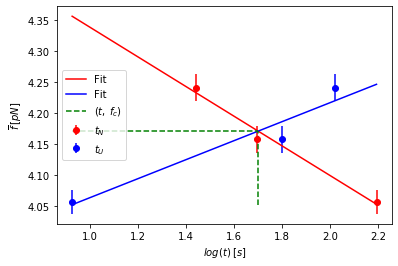

Stimiamo i parametri del fit lineare: m1 = -0.23919611248932576, con incertezza = 0.03720641588401436, 
 q1 = 4.578470514104738, con incertezza = 0.06835383532423975
Stimiamo i parametri del fit lineare: m2 = 0.15320300481177973, con incertezza = 0.02446355982445944, 
 q2 = 3.9107894618922447, con incertezza = 0.03938497238519528
La forza di coesistenza qui vale: fc = 4.171469822639215, con incertezza = 0.050431734756792516
Il tempo medi di residenza vale: tc = 5.482359429077651, con incertezza = 1.528192619917248
Stimiamo un nuovo DeltaG_NU = 115.44134643804732, con incertezza = 32.319288973395764


((-0.23919611248932576, 0.03720641588401436),
 (4.578470514104738, 0.06835383532423975),
 (0.15320300481177973, 0.02446355982445944),
 (3.9107894618922447, 0.03938497238519528),
 (4.171469822639215, 0.050431734756792516),
 (5.482359429077651, 1.528192619917248),
 (115.44134643804732, 32.319288973395764))

In [54]:
grafici.residence_time(native_hmm, unfolded_hmm, forces_average, forces_average_std)

In [55]:
grafici.write_on_txt()

UnsupportedOperation: not writable